In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Loading dataset
mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
K = len(set(y_train))

In [ ]:
i = Input(shape = X_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation = "relu")(i)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Conv2D(64, (3,3), strides = 2, activation = "relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Conv2D(128, (3,3), strides = 2, activation = "relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(256, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(K,activation = "softmax")(x)

model = Model(i,x)

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics = ["accuracy"])

r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, batch_size=32, callbacks=[EarlyStopping(monitor="val_accuracy", patience=5)])

Epoch 1/50
1875/1875 [==============================] - 41s 21ms/step - loss: 0.5723 - accuracy: 0.7918 - val_loss: 0.4063 - val_accuracy: 0.8506
Epoch 2/50
1875/1875 [==============================] - 37s 20ms/step - loss: 0.4154 - accuracy: 0.8457 - val_loss: 0.3864 - val_accuracy: 0.8545
Epoch 3/50
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3752 - accuracy: 0.8593 - val_loss: 0.3411 - val_accuracy: 0.8765
Epoch 4/50
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3485 - accuracy: 0.8683 - val_loss: 0.3318 - val_accuracy: 0.8800
Epoch 5/50
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3370 - accuracy: 0.8734 - val_loss: 0.3167 - val_accuracy: 0.8801
Epoch 6/50
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3204 - accuracy: 0.8795 - val_loss: 0.3159 - val_accuracy: 0.8826
Epoch 7/50
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3089 - accuracy: 0.8841 - val_loss: 0.3037 -

In [ ]:
plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend();

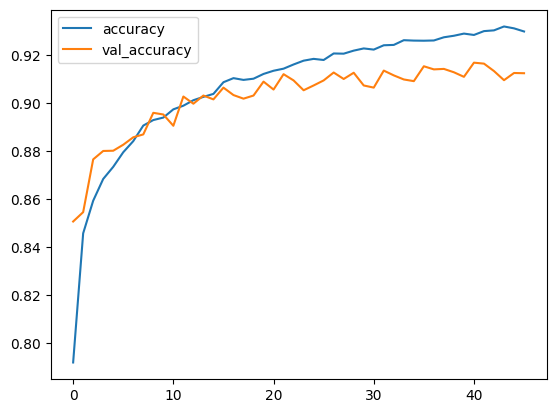

In [ ]:
plt.plot(r.history["accuracy"], label = "accuracy")
plt.plot(r.history["val_accuracy"], label = "val_accuracy")
plt.legend();

In [ ]:
y_preds = model.predict(X_test)

In [ ]:
y_preds = y_preds.argmax(axis=1)
y_preds

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
cm = confusion_matrix(y_test, y_preds)
matrix = ConfusionMatrixDisplay(cm, display_labels=class_names)
matrix.plot(xticks_rotation="vertical");

In [ ]:
wrongIdx = np.where(y_preds != y_test)[0]
idx = np.random.choice(wrongIdx)
plt.imshow(X_test[idx], cmap = "gray")
plt.title(f"Actual: {class_names[y_test[idx]]}   Predicted: {class_names[y_preds[idx]]}");